In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [10]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [22]:
x, y = mnist['data'], mnist['target']

In [24]:
x.shape, y.shape

((70000, 784), (70000,))

In [47]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

## Visualize image

In [34]:
random_image = x[0]
random_image_2d = random_image.reshape(28, 28)

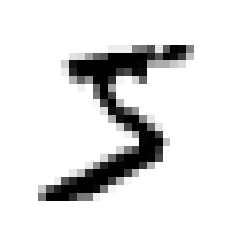

In [50]:
plt.imshow(random_image_2d, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

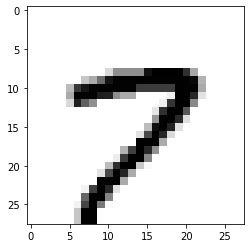

In [49]:

plt.imshow(x[123].reshape(28,28), cmap=mpl.cm.binary)

In [51]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

## One-digit detector (binary detector)

In [52]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [58]:
model = SGDClassifier(random_state=42)
model.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
model.predict([x_train[0]])

array([ True])

## Validation

In [64]:
cross_val_score(model, x_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

This is pretty high accuracy, but we cannot be below 0.9 because we have only 10% images with five digit.

### Confusion Matrix

In [66]:
predicts = cross_val_predict(model, x_train, y_train_5, cv=3)

In [68]:
confusion_matrix(y_train_5, predicts) ## [TRUE Negative, False Positive],[False Negative, True Positive]

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [70]:
confusion_matrix(y_train_5, y_train_5) # Perfect predictions

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision/Recall Tradeoff

In [75]:
precision_score(y_train_5, predicts), recall_score(y_train_5, predicts), f1_score(y_train_5, predicts)

(0.8370879772350012, 0.6511713705958311, 0.7325171197343846)

In [78]:
predict_scores = cross_val_predict(model, x_train, y_train_5, cv=3, method='decision_function')

In [79]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, predict_scores)

In [81]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.show()
    # highlight the threshold, add the legend, axis label and grid

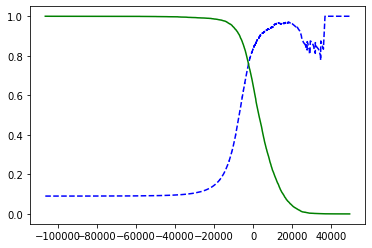

In [82]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [94]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (predict_scores >= threshold_90_precision)

In [97]:
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)
#If someone says “let’s reach 99% precision,” you should ask, “atwhat recall?”

(0.9000345901072293, 0.4799852425751706)